# NYC Fund-Raising Data

##importing libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

##Loading the CSV file

In [2]:
nyc= pd.read_csv(r"C:\Users\sayal\Desktop\College_stuff\BAP\ny.csv", index_col=False, low_memory= False)

In [3]:
nyc.shape

(649460, 18)

In [4]:
nyc.describe()

,contb_receipt_amt,file_num
count,6.494600e+05,6.494600e+05
mean,2.643009e+02,1.105477e+06
std,2.576947e+04,2.806734e+04
min,-1.010000e+04,1.003942e+06
25%,1.500000e+01,1.079445e+06
50%,2.700000e+01,1.104813e+06
75%,1.000000e+02,1.133832e+06
max,1.277771e+07,1.146285e+06


In [5]:
nyc.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","JONES TAKATA, LOUISE",NEW YORK,NY,100162783,NaN,RETIRED,100.00,15-APR-16,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4732422,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CODY, ERIN",BUFFALO,NY,142221910,RUPP BAASE PFALZGRAF CUNNINGHAM LLC,ATTORNEY,66.95,24-APR-16,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4752463,P2016
2,C00577130,P60007168,"Sanders, Bernard","KEITH, SUSAN H",NEW YORK,NY,100133107,NOT EMPLOYED,NOT EMPLOYED,50.00,06-MAR-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKZ1KR1,P2016
3,C00577130,P60007168,"Sanders, Bernard","LEPAGE, WILLIAM",BROOKLYN,NY,112381202,NEW YORK UNIVERSITY,UNDERGRADUATE ADMINISTRATOR,15.00,04-MAR-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWHRY0,P2016
4,C00575795,P00003392,"Clinton, Hillary Rodham","BIELAT, VEDORA",PLATTSBURGH,NY,129011729,INFORMATION REQUESTED,INFORMATION REQUESTED,100.00,12-APR-16,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4714688,P2016


In [6]:
nyc.dtypes

cmte_id               object
cand_id               object
cand_nm               object
contbr_nm             object
contbr_city           object
contbr_st             object
contbr_zip            object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
receipt_desc          object
memo_cd               object
memo_text             object
form_tp               object
file_num               int64
tran_id               object
election_tp           object
dtype: object

In [7]:
#Normalization of a particular column
nyc['cand_nm'].value_counts(normalize=True)

Clinton, Hillary Rodham      0.615160
Sanders, Bernard             0.268783
Trump, Donald J.             0.056864
Cruz, Rafael Edward 'Ted'    0.025845
Carson, Benjamin S.          0.010221
Rubio, Marco                 0.007411
Bush, Jeb                    0.003751
Kasich, John R.              0.002079
Fiorina, Carly               0.001875
Paul, Rand                   0.001757
Stein, Jill                  0.001541
Johnson, Gary                0.001204
Christie, Christopher J.     0.000748
Graham, Lindsey O.           0.000557
O'Malley, Martin Joseph      0.000528
Walker, Scott                0.000408
Huckabee, Mike               0.000391
Pataki, George E.            0.000280
Lessig, Lawrence             0.000179
McMullin, Evan               0.000159
Santorum, Richard J.         0.000106
Webb, James Henry Jr.        0.000071
Perry, James R. (Rick)       0.000042
Jindal, Bobby                0.000032
Gilmore, James S III         0.000008
Name: cand_nm, dtype: float64

In [8]:
#To check null values- isnull() and to get count of values- value_counts()
pd.isnull(nyc.contbr_employer).value_counts()

False    560658
True      88802
Name: contbr_employer, dtype: int64

#Analyzing NYC data to know the possible trends of NY donors. Following are some of the questions raised to understand the dataset

1) Whether its possible to identify the 'Party' for each candidate ? (data wrangling)

Political candidates belong to a political party, but that column is missing from the table.So, I have created a dictonary with Part column.

In [9]:
dfc = nyc.cand_nm.value_counts()
ucm = dfc.index.values # to create an array representing the data in the index
ucm

array(['Clinton, Hillary Rodham', 'Sanders, Bernard', 'Trump, Donald J.',
       "Cruz, Rafael Edward 'Ted'", 'Carson, Benjamin S.', 'Rubio, Marco',
       'Bush, Jeb', 'Kasich, John R.', 'Fiorina, Carly', 'Paul, Rand',
       'Stein, Jill', 'Johnson, Gary', 'Christie, Christopher J.',
       'Graham, Lindsey O.', "O'Malley, Martin Joseph", 'Walker, Scott',
       'Huckabee, Mike', 'Pataki, George E.', 'Lessig, Lawrence',
       'McMullin, Evan', 'Santorum, Richard J.', 'Webb, James Henry Jr.',
       'Perry, James R. (Rick)', 'Jindal, Bobby', 'Gilmore, James S III'],
      dtype=object)

In [10]:
#creating dataframe
dfc2 = pd.DataFrame({'cand_nm':ucm})
dfc2.loc[[0,1,14,21,18],'Party']='Democrat'
dfc2.loc[10,'Party']='Green'
dfc2.loc[11,'Party']='Libertarian'
dfc2.loc[19,'Party']='Independent'
dfc2.loc[dfc2['Party'].isnull(),'Party']='Republican'
dfc2

,cand_nm,Party
0,"Clinton, Hillary Rodham",Democrat
1,"Sanders, Bernard",Democrat
2,"Trump, Donald J.",Republican
3,"Cruz, Rafael Edward 'Ted'",Republican
4,"Carson, Benjamin S.",Republican
5,"Rubio, Marco",Republican
6,"Bush, Jeb",Republican
7,"Kasich, John R.",Republican
8,"Fiorina, Carly",Republican
9,"Paul, Rand",Republican


In [11]:
#creating a dictonary of the dataframe
cand_dict = dict(zip(dfc2.cand_nm, dfc2.Party))
cand_dict

{'Clinton, Hillary Rodham': 'Democrat',
 'Sanders, Bernard': 'Democrat',
 'Trump, Donald J.': 'Republican',
 "Cruz, Rafael Edward 'Ted'": 'Republican',
 'Carson, Benjamin S.': 'Republican',
 'Rubio, Marco': 'Republican',
 'Bush, Jeb': 'Republican',
 'Kasich, John R.': 'Republican',
 'Fiorina, Carly': 'Republican',
 'Paul, Rand': 'Republican',
 'Stein, Jill': 'Green',
 'Johnson, Gary': 'Libertarian',
 'Christie, Christopher J.': 'Republican',
 'Graham, Lindsey O.': 'Republican',
 "O'Malley, Martin Joseph": 'Democrat',
 'Walker, Scott': 'Republican',
 'Huckabee, Mike': 'Republican',
 'Pataki, George E.': 'Republican',
 'Lessig, Lawrence': 'Democrat',
 'McMullin, Evan': 'Independent',
 'Santorum, Richard J.': 'Republican',
 'Webb, James Henry Jr.': 'Democrat',
 'Perry, James R. (Rick)': 'Republican',
 'Jindal, Bobby': 'Republican',
 'Gilmore, James S III': 'Republican'}

In [12]:
#adding column 'Party' to the  dataframe using the dictionary
nyc['Party'] = nyc['cand_nm'].map(cand_dict)
nyc[['cand_nm','Party']].head(10)

,cand_nm,Party
0,"Clinton, Hillary Rodham",Democrat
1,"Clinton, Hillary Rodham",Democrat
2,"Sanders, Bernard",Democrat
3,"Sanders, Bernard",Democrat
4,"Clinton, Hillary Rodham",Democrat
5,"Sanders, Bernard",Democrat
6,"Sanders, Bernard",Democrat
7,"Clinton, Hillary Rodham",Democrat
8,"Clinton, Hillary Rodham",Democrat
9,"Trump, Donald J.",Republican


2) Convert the contb receipt dt column into an actual date object (data wrangling)?

In [13]:
nyc['Date']= pd.to_datetime(nyc['contb_receipt_dt'])
nyc[['contb_receipt_dt','Date']].head()

,contb_receipt_dt,Date
0,15-APR-16,2016-04-15
1,24-APR-16,2016-04-24
2,06-MAR-16,2016-03-06
3,04-MAR-16,2016-03-04
4,12-APR-16,2016-04-12


In [15]:
#nyc['Date1']=pd.to_datetime(nyc['contb_receipt_dt']).dt.strftime('%m/%d/%Y')

In [16]:
nyc[['contb_receipt_dt','Date']].head()

,contb_receipt_dt,Date
0,15-APR-16,2016-04-15
1,24-APR-16,2016-04-24
2,06-MAR-16,2016-03-06
3,04-MAR-16,2016-03-04
4,12-APR-16,2016-04-12


3) Using group by, show the number (count) of donations given to each party?

In [17]:
nyc.groupby('Party')['contb_receipt_amt'].count()

Party
Democrat       574591
Green            1001
Independent       103
Libertarian       782
Republican      72983
Name: contb_receipt_amt, dtype: int64

4) Using group by, show the number of donations given to each party,over time

In [18]:
nyc.groupby(['Party','Date'])['contb_receipt_amt'].count()

Party       Date      
Democrat    2014-11-20      3
            2014-11-21      1
            2014-12-24      1
            2015-02-26      1
            2015-03-15      1
            2015-03-29      1
            2015-04-05      1
            2015-04-12    365
            2015-04-13    156
            2015-04-14    118
            2015-04-15     86
            2015-04-16    100
            2015-04-17     94
            2015-04-18     29
            2015-04-19     39
            2015-04-20    108
            2015-04-21     99
            2015-04-22     83
            2015-04-23     84
            2015-04-24    100
            2015-04-25     29
            2015-04-26     51
            2015-04-27    136
            2015-04-28     51
            2015-04-29     67
            2015-04-30     78
            2015-05-01     74
            2015-05-02     13
            2015-05-03     31
            2015-05-04     33
                         ... 
Republican  2016-12-01    103
            2016-

5) Using group by, show the total dollar amount of donations given to each party


In [19]:
pd.options.display.float_format = '{:,.2f}'.format

In [20]:
nyc.groupby('Party')['contb_receipt_amt'].sum()

Party
Democrat      153,652,597.45
Green             263,664.10
Independent        30,187.50
Libertarian       246,860.47
Republican     17,459,578.06
Name: contb_receipt_amt, dtype: float64

6) Using group by, show the total dollar amount of donations given to each party

In [21]:
nyc.groupby(['Party','Date'])['contb_receipt_amt'].sum()

Party       Date      
Democrat    2014-11-20     7,800.00
            2014-11-21       500.00
            2014-12-24       250.00
            2015-02-26     2,600.00
            2015-03-15       500.00
            2015-03-29     1,000.00
            2015-04-05        50.00
            2015-04-12   245,296.27
            2015-04-13   150,179.16
            2015-04-14   212,985.00
            2015-04-15   128,199.00
            2015-04-16   144,311.85
            2015-04-17   127,645.16
            2015-04-18    39,035.00
            2015-04-19    50,695.00
            2015-04-20   183,634.50
            2015-04-21   198,895.00
            2015-04-22   147,112.57
            2015-04-23   117,089.59
            2015-04-24   182,970.00
            2015-04-25    46,690.00
            2015-04-26    66,835.00
            2015-04-27   213,820.16
            2015-04-28    81,360.00
            2015-04-29   102,519.00
            2015-04-30   128,182.50
            2015-05-01    95,948.16
     

7) Which occupations donated the top 5 most money?

In [ ]:
#df=nyc.groupby('contbr_occupation')['contb_receipt_amt'].sum().reset_index() #reset_index- reassigns new index
#df.sort_values('contb_receipt_amt',ascending=False, inplace= True) #inplace= True- shows index of the dataset, inplace= False- shows index of reset_index
#df.head()

nyc.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(ascending= False).head()


#or
#df.nlargest(5,'contb_receipt_amt')


8) Which occupations donated the least 5 amount of money?

In [22]:
df=nyc.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(ascending= True).head()

#df.nsmallest(5,'contb_receipt_amt')


9) Which employer's employees gave the most money, give the top 5?

In [23]:
nyc.groupby(['contbr_employer','contbr_nm'])['contb_receipt_amt'].sum().sort_values(ascending=False).head()

contbr_employer     contbr_nm       
CHADBOURNE & PARKE  PATAKI, GEORGE E   30,278.25
HOMEMAKER           HAMLIN, TRISH      23,100.00
SASCO               SMEAD, LARRY       21,100.00
MCKINSEY & COMPANY  ELLING, MARTIN     18,900.00
ANKOM TECHNOLOGY    KOMAREK, BRENDA    16,000.00
Name: contb_receipt_amt, dtype: float64

10) For each candidate, what were the top 5 occupations that donated to their election?

In [24]:
#nyc['cand_id'].nunique() #to get unique counts
df10 = nyc.groupby(['cand_nm', 'contbr_occupation'])['contb_receipt_amt'].sum().reset_index()
df10.sort_values(['cand_nm', 'contb_receipt_amt'], ascending=[True, False],inplace=True)
df10.groupby('cand_nm').head()


,cand_nm,contbr_occupation,contb_receipt_amt
335,"Bush, Jeb",RETIRED,"399,174.31"
192,"Bush, Jeb",HOMEMAKER,"286,522.00"
18,"Bush, Jeb",ATTORNEY,"228,157.00"
152,"Bush, Jeb",FINANCE,"144,400.00"
196,"Bush, Jeb",INFORMATION REQUESTED PER BEST EFFORTS,"132,795.00"
718,"Carson, Benjamin S.",RETIRED,"257,266.59"
563,"Carson, Benjamin S.",INFORMATION REQUESTED PER BEST EFFORTS,"92,623.00"
654,"Carson, Benjamin S.",PHYSICIAN,"22,513.16"
553,"Carson, Benjamin S.",HOMEMAKER,"19,304.00"
399,"Carson, Benjamin S.",ADMINISTRATION,"13,300.00"


11) For the 5 candidates that raised the most money, graph their donations by time, in a line graph.

In [27]:
df11 = nyc.groupby('cand_nm')['contb_receipt_amt'].sum().reset_index()
df11_p = df11.nlargest(5,'contb_receipt_amt')
df11_g = nyc[nyc.cand_nm.isin(df11_p.cand_nm)][['cand_nm','Date','contb_receipt_amt']]
df11_p

,cand_nm,contb_receipt_amt
3,"Clinton, Hillary Rodham","145,248,692.93"
19,"Sanders, Bernard","8,049,475.21"
22,"Trump, Donald J.","5,718,994.33"
0,"Bush, Jeb","3,587,710.31"
18,"Rubio, Marco","2,386,984.25"


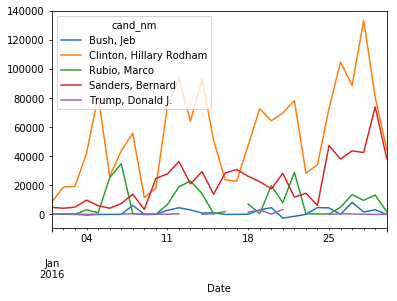

In [28]:

dfpiv=pd.pivot_table(df11_g , values='contb_receipt_amt', index=['Date'],columns=['cand_nm'], aggfunc=np.sum)
dfpiv.loc['2016-01-01':'2016-01-30'].plot.line()
